# [AVNIR-2/ALOS の光学画像を取得](https://www.tellusxdp.com/ja/howtouse/dev/20200220_000179.html)

## AVNIR-2 の API を使用する

In [1]:
import os
import json

fpth_secret = os.path.join(os.environ['HOME'], 'jupyter/secret.json')
with open(fpth_secret) as f:
    secret = json.load(f)
TOKEN = secret['tellus']
HEADERS = {
    'Authorization': 'Bearer ' + TOKEN
}

https://gisapi.tellusxdp.com/blend/13/7276/3226.png


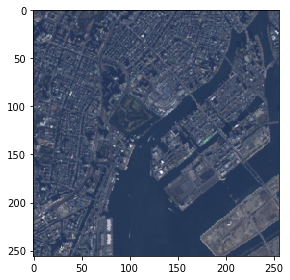

In [3]:
import requests
from skimage import io
from io import BytesIO
%matplotlib inline

def fetch_avnir2_image(tile, color):
    url = 'https://gisapi.tellusxdp.com'
    url += '/blend/{z}/{x}/{y}.png'.format(**tile)
    
    print(url)
    
    r = requests.get(url, params=color, headers=HEADERS)
    
    return io.imread(BytesIO(r.content))

tile = {
    'x': 7276,
    'y': 3226,
    'z': 13
}
color = {
    'opacity': 1,
    'r': 3,
    'g': 2,
    'b':13,
    'rdepth': 1,
    'gdepth': 1,
    'bdepth':1
}
img = fetch_avnir2_image(tile, color)
io.imshow(img)

In [ ]:
import numpy as n
color = {'preset': 'natural'}
natural_img = fetch_avnir2_image(tile, color)
io.imshow(np.staimg)